In [1]:
import torchOptics.optics as tt
import warnings
warnings.filterwarnings('ignore') ## ignore warnings
import torch.nn as nn
import torch

In [2]:
meta = {'wl':(638e-9, 515e-9, 450e-9), 'dx': (6.3e-6, 6.3e-6)}
timg = tt.imread('frog.png', meta=meta)
field = timg.clone()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



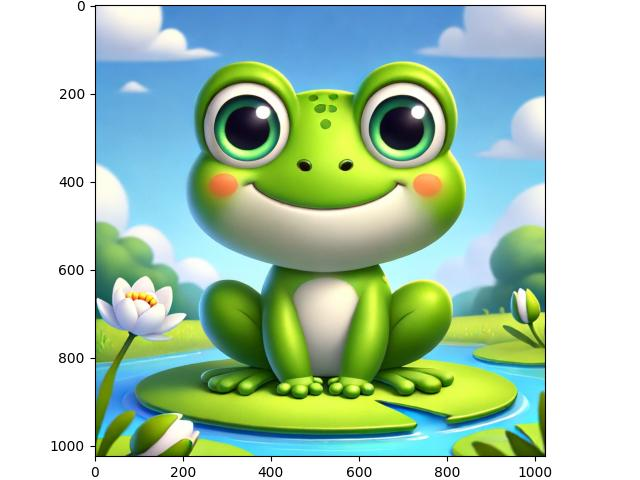
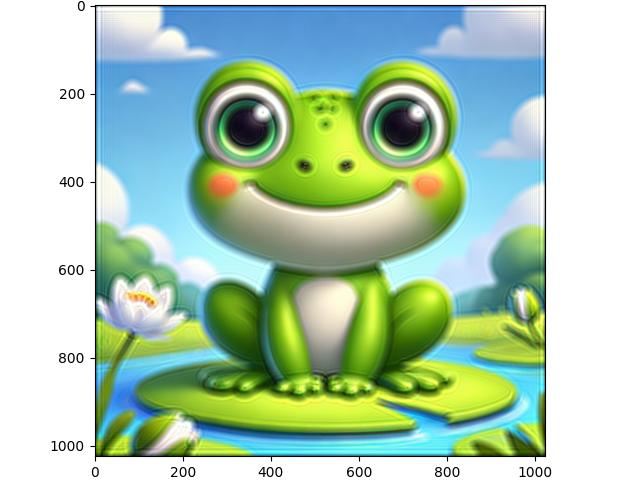
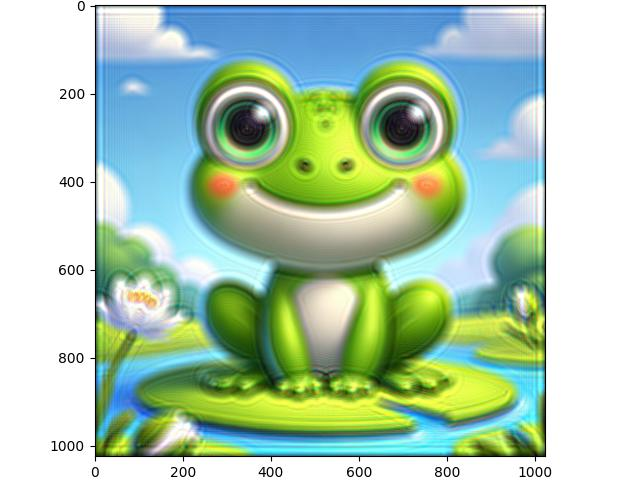

In [4]:
sim = tt.simulate(field, 0)
tt.show(sim)
sim = tt.simulate(field, 10e-3)
tt.show(sim)
sim = tt.simulate(field, 20e-3)
tt.show(sim)

In [6]:
field = timg.clone()
field.requires_grad = True
optimizer = torch.optim.Adam([field], lr=0.0001) # 학습률이라는 상관 없는것 같음
criterion = torch.nn.MSELoss()
for i in range(1000):
    optimizer.zero_grad()
    ## loss function
    sim = tt.simulate(field, 20e-3,).abs()**2
    loss = criterion(sim, timg)
    loss.backward()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



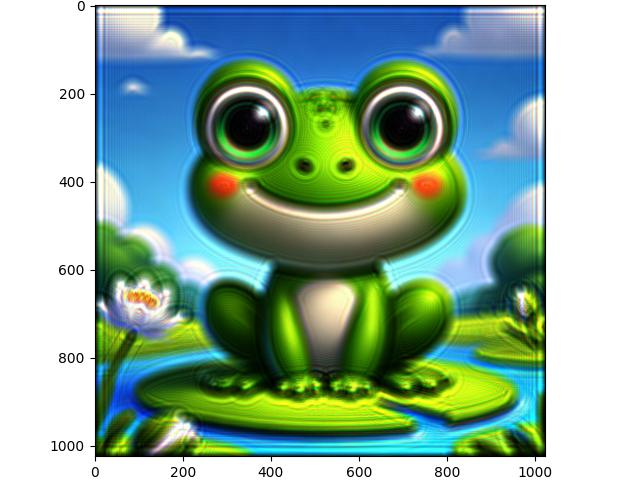

In [7]:
tt.show(tt.simulate(field, 20e-3,).abs()**2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



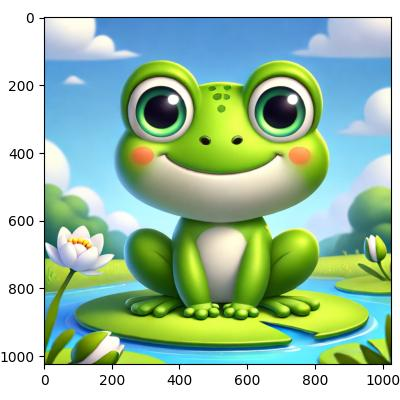
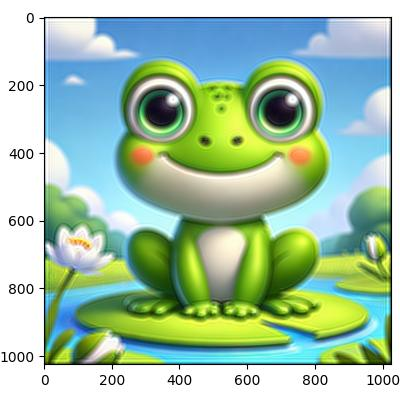
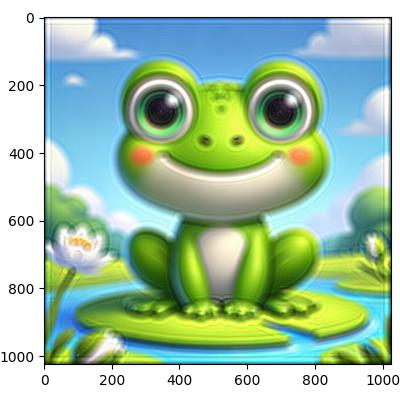

In [10]:
# 이미지가 어둡게 나옴 -> 코드를 수정해서 어두움을 없애보기
# 입력 이미지의 값 0..1 -> 제곱을 없야주면 밝아지지 않을까?
tt.show(tt.simulate(timg, 0).abs(), figsize=(4, 4))
tt.show(tt.simulate(timg, 10e-3).abs(), figsize=(4, 4))
tt.show(tt.simulate(timg, 20e-3).abs(), figsize=(4, 4))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



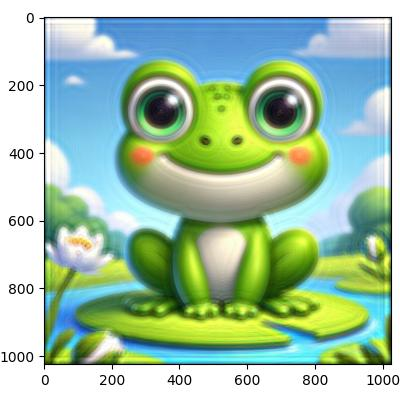

In [11]:
field = timg.clone()
field.requires_grad = True
optimizer = torch.optim.Adam([field], lr=0.0001)
criterion = torch.nn.MSELoss()

for i in range(1000):
    optimizer.zero_grad()
    # 손실 함수
    sim = tt.simulate(field, 20e-3).abs()  # 절대값만 사용하여 시뮬레이션
    loss = criterion(sim, timg.abs())  # 원본 이미지의 진폭과 비교
    loss.backward()
    optimizer.step()

# 최적화 결과 시각화
result = tt.simulate(field, 20e-3).abs()
tt.show(result, figsize=(4, 4))

In [13]:
import torch.nn as nn
import torch
import torch.nn.functional as F
def loss_func(field, z, timg):
    sim = tt.simulate(field, z,).abs()**2
    loss = F.mse_loss(sim, timg)
    return loss

field = timg.clone()
r = tt.optimizer(field, loss_func, 20e-3, timg)

0.0016318606212735176: 100%|██████████| 500/500 [00:05<00:00, 94.29it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


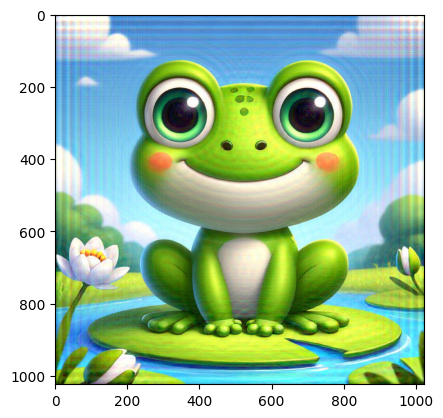

{'wl': (6.38e-07, 5.15e-07, 4.5e-07), 'dx': (6.3e-06, 6.3e-06)}

In [14]:
tt.simulate(r[0], 20e-3,).abs()**2

In [15]:
import torch.nn as nn
import torch
import torch.nn.functional as F
def loss_func(field, z, timg):
    sim = tt.simulate(field, z,).abs()
    loss = F.mse_loss(sim, timg)
    return loss

field = timg.clone()
r = tt.optimizer(field, loss_func, 20e-3, timg)

0.001165993744507432: 100%|██████████| 500/500 [00:05<00:00, 97.90it/s]  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


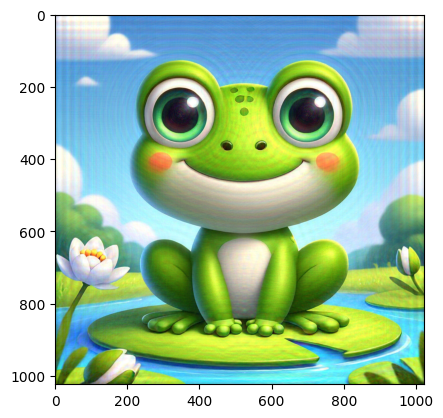

{'wl': (6.38e-07, 5.15e-07, 4.5e-07), 'dx': (6.3e-06, 6.3e-06)}

In [16]:
tt.simulate(r[0], 20e-3,).abs()